<a href="https://colab.research.google.com/github/ReynosoRocio/deteccionContornosEsquinas/blob/main/2804actividades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

plt.style.use("dark_background")

924 1642


<function matplotlib.pyplot.imshow>

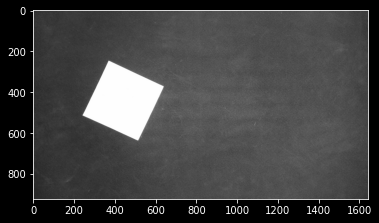

In [10]:
#Cargamos la imagen seleccionada y la mostramos en la pantalla
#Volvemos la imagen gris mediante esta linea
img = cv2.imread('cuad2.jpg',0)
filas,columnas = img.shape
print(filas,columnas)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='Accent')
plt.imshow




<function matplotlib.pyplot.imshow>

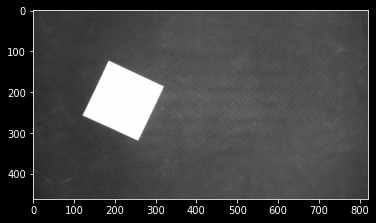

In [11]:
#Reescalado de la imagen

escala=1/2
#Hacemos el reescalado de la imagen con la escala anterior
img=cv2.resize(img,(round(escala*img.shape[1]),round(escala*img.shape[0])))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='Accent')
plt.imshow



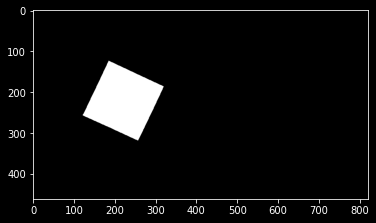

In [12]:
#Binarizado
t,imgBin= cv2.threshold(img,200,1,cv2.THRESH_BINARY) #esta funcion regresa dos parametros t= threshold y la img binarizada  
plt.imshow(imgBin,cmap='gray')
plt.show() 

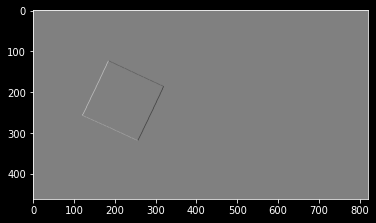

In [13]:
#Aplicar gradiente en x

kernel_x=[-1,1]
deri_x = np.zeros((imgBin.shape[0],imgBin.shape[1]))
for i in range(imgBin.shape[0]):#filas
  for j in range(imgBin.shape[1]):#columnas
    conv=np.sum(kernel_x*imgBin[i,j:j+2])
    deri_x[i,j]=conv
plt.imshow(deri_x,cmap='gray')
plt.show()





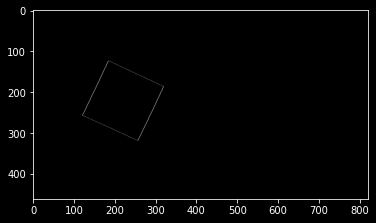

In [14]:
#Obtener el valor absoluto de la imagen
deri_x_abs = abs(deri_x)
plt.imshow(deri_x_abs, cmap='gray')
plt.show()

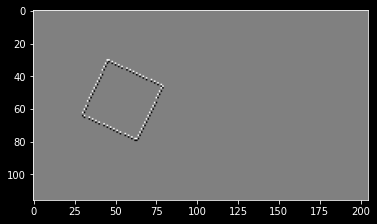

In [ ]:
#Aplicar gradiente en y

kernel_y=[-1,1]
deri_y = np.zeros((deri_x_abs.shape[0],imgBin.shape[1]))
for i in range(deri_x_abs.shape[0]):#filas
  for j in range(deri_x_abs.shape[1]):#columnas
    conv=np.sum(kernel_y*deri_x_abs[i:i+2,j])
    deri_y[i,j]=conv
plt.imshow(deri_y,cmap='gray')
plt.show()


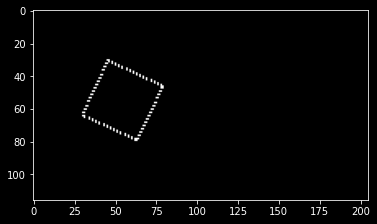

In [ ]:
#Obtener el valor absoluto de la imagen
deri_y_abs = abs(deri_y)
plt.imshow(deri_y_abs, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Sobel Y')

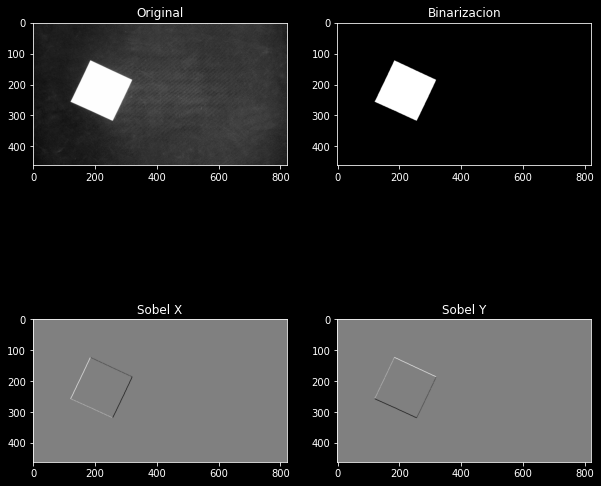

In [15]:
#Aplicando el algoritmo de Sobel
sobelx=cv2.Sobel(imgBin,cv2.CV_64F,1,0,ksize=3)
#Aplicando el algoritmo de Sobel en y
sobely=cv2.Sobel(imgBin,cv2.CV_64F,0,1,ksize=3)


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(2,2,2)
plt.imshow(imgBin,cmap='gray')
plt.title('Binarizacion')
plt.subplot(2,2,3)
plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X')
plt.subplot(2,2,4)
plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y')



In [18]:
#Deteccion de esquinas
#las esquinas que queremos
#tamaño de paso/ resolucion entre menor sea el paso, mayor es la calidad para reconocer las esquinas
#calidad del contorno o de la esquina
cv2.goodFeaturesToTrack(imgBin,4,.5,10)

array([[[257., 318.]],

       [[185., 124.]],

       [[122., 256.]],

       [[319., 187.]]], dtype=float32)

Numero de esquinas:  4


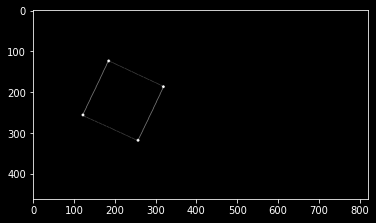

In [21]:
esquinas = cv2.goodFeaturesToTrack(imgBin,4,0.6,10)
print('Numero de esquinas: ',len(esquinas))
dery_copy = np.copy(deri_x_abs)
for i in esquinas:
  x=i[0,0]
  y=i[0,1]
  cv2.circle(dery_copy,(x,y),2,1,2)
plt.imshow(dery_copy,cmap='gray')
plt.show()
#radio grosor color
